# Grid search results analysis

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from itertools import combinations
import math

FONTSIZE=14

In [2]:
data_df = pd.read_pickle('data/grid_search/grid_search.pkl')
data_df['dtype'].astype('str')
data_df.head()

,features,bond_dim,batch_size,initialize,dtype,loss,train_acc,test_acc,train_acc0,test_acc0,time
0,4,2,16,True,torch.float64,0.001245,1.0000,1.0,0.6684,0.664,200.066460
1,4,2,16,False,torch.float64,0.002246,0.9997,1.0,0.3502,0.338,194.302091
2,4,2,32,True,torch.float64,0.001204,1.0000,1.0,0.6655,0.673,131.457987
3,4,2,32,False,torch.float64,0.001216,1.0000,1.0,0.3023,0.305,126.006699
4,4,2,128,True,torch.float64,0.001168,1.0000,1.0,0.5006,0.501,77.283521


In [3]:
# divide float and complex
float_df = data_df[data_df['dtype'] == 'torch.float64'].drop(columns=['dtype'])
complex_df = data_df[data_df['dtype'] == 'torch.complex128'].drop(columns=['dtype'])

float_df.head()

,features,bond_dim,batch_size,initialize,loss,train_acc,test_acc,train_acc0,test_acc0,time
0,4,2,16,True,0.001245,1.0000,1.0,0.6684,0.664,200.066460
1,4,2,16,False,0.002246,0.9997,1.0,0.3502,0.338,194.302091
2,4,2,32,True,0.001204,1.0000,1.0,0.6655,0.673,131.457987
3,4,2,32,False,0.001216,1.0000,1.0,0.3023,0.305,126.006699
4,4,2,128,True,0.001168,1.0000,1.0,0.5006,0.501,77.283521


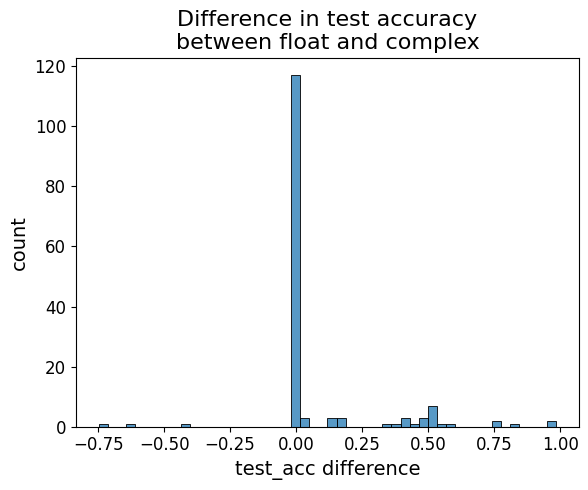

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.histplot(float_df.set_index(['features', 'bond_dim', 'batch_size', 'initialize'])['test_acc'] - complex_df.set_index(['features', 'bond_dim', 'batch_size', 'initialize'])['test_acc'], bins=50, ax=ax)
ax.set_title('Difference in test accuracy\nbetween float and complex', fontsize=FONTSIZE+2)
ax.set_xlabel('test_acc difference', fontsize=FONTSIZE)
ax.set_ylabel('count', fontsize=FONTSIZE)
ax.tick_params(labelsize=FONTSIZE-2)
fig.tight_layout()

fig.savefig('data/grid_search/float_complex_diff.png', dpi=600)

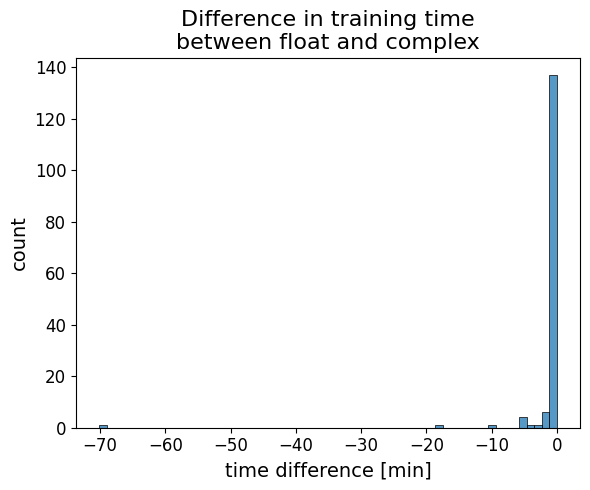

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.histplot((float_df.set_index(['features', 'bond_dim', 'batch_size', 'initialize'])['time'] - complex_df.set_index(['features', 'bond_dim', 'batch_size', 'initialize'])['time']) / 60., bins=60, ax=ax)
ax.set_title('Difference in training time\nbetween float and complex', fontsize=FONTSIZE+2)
ax.set_xlabel('time difference [min]', fontsize=FONTSIZE)
ax.set_ylabel('count', fontsize=FONTSIZE)
ax.tick_params(labelsize=FONTSIZE-2)
fig.tight_layout()

fig.savefig('data/grid_search/float_complex_timediff.png', dpi=600)

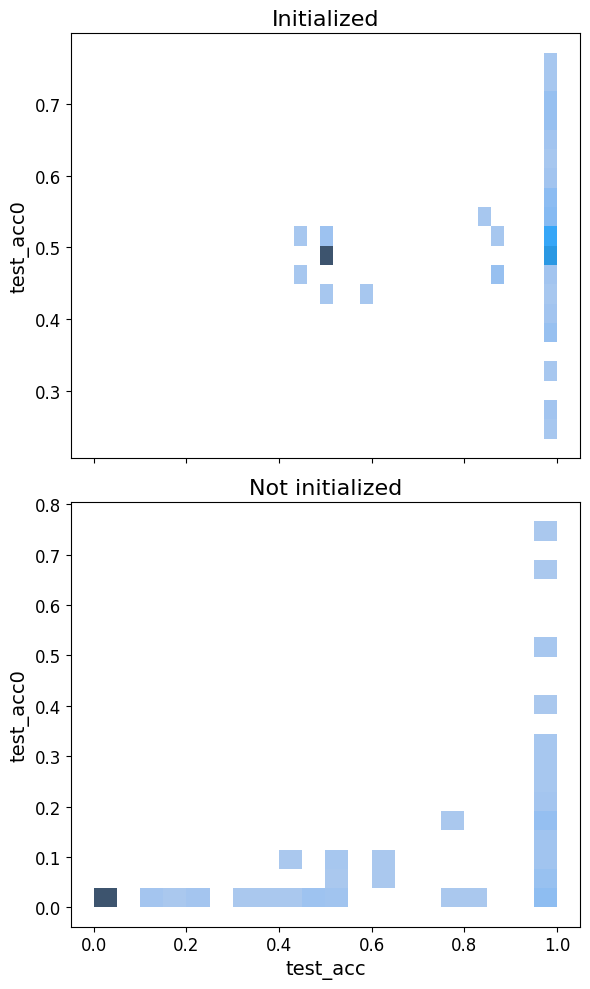

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(6, 10), sharex=True)
df_initTrue = data_df[data_df['initialize'] == True].copy()
df_initFalse = data_df[data_df['initialize'] == False].copy()
df_initTrue['diff'] = df_initTrue['test_acc'] - df_initTrue['test_acc0']
df_initFalse['diff'] = df_initFalse['test_acc'] - df_initFalse['test_acc0']
sns.histplot(df_initTrue[['test_acc', 'test_acc0']], x = 'test_acc', y='test_acc0', bins=20, ax=ax[0])
sns.histplot(df_initFalse[['test_acc','test_acc0']], x = 'test_acc', y='test_acc0', bins=20, ax=ax[1])
ax[0].set_title('Initialized', fontsize=FONTSIZE+2)
ax[1].set_title('Not initialized', fontsize=FONTSIZE+2)
ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=FONTSIZE)
ax[1].set_xlabel(ax[1].get_xlabel(), fontsize=FONTSIZE)
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=FONTSIZE)
ax[1].set_ylabel(ax[1].get_ylabel(), fontsize=FONTSIZE)
ax[0].tick_params(labelsize=FONTSIZE-2)
ax[1].tick_params(labelsize=FONTSIZE-2)

#fig.suptitle('Difference in test accuracy\nafter and before training', fontsize=FONTSIZE+2)
fig.tight_layout()

fig.savefig('data/grid_search/init_diff.png', dpi=600)

In [23]:
def heat_pairplot(df, variables, value='train_acc'):
    # get all combinations of variables
    pairs = list(combinations(variables, 2))

    rows = math.floor(len(pairs)**0.5)
    cols = math.ceil(len(pairs)/rows)
    fig, ax = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
    ax = ax.flatten()

    # plot
    for i, combo in enumerate(pairs):
        sns.heatmap(df.pivot_table(index=combo[0], columns=combo[1], values=value, aggfunc='mean'), ax=ax[i], annot=True, fmt='.3f', cmap='Blues')
        ax[i].set_title(f'{combo[0]} vs {combo[1]}')
        ax[i].set_xlabel(combo[1])
        ax[i].set_ylabel(combo[0])

    return fig, ax

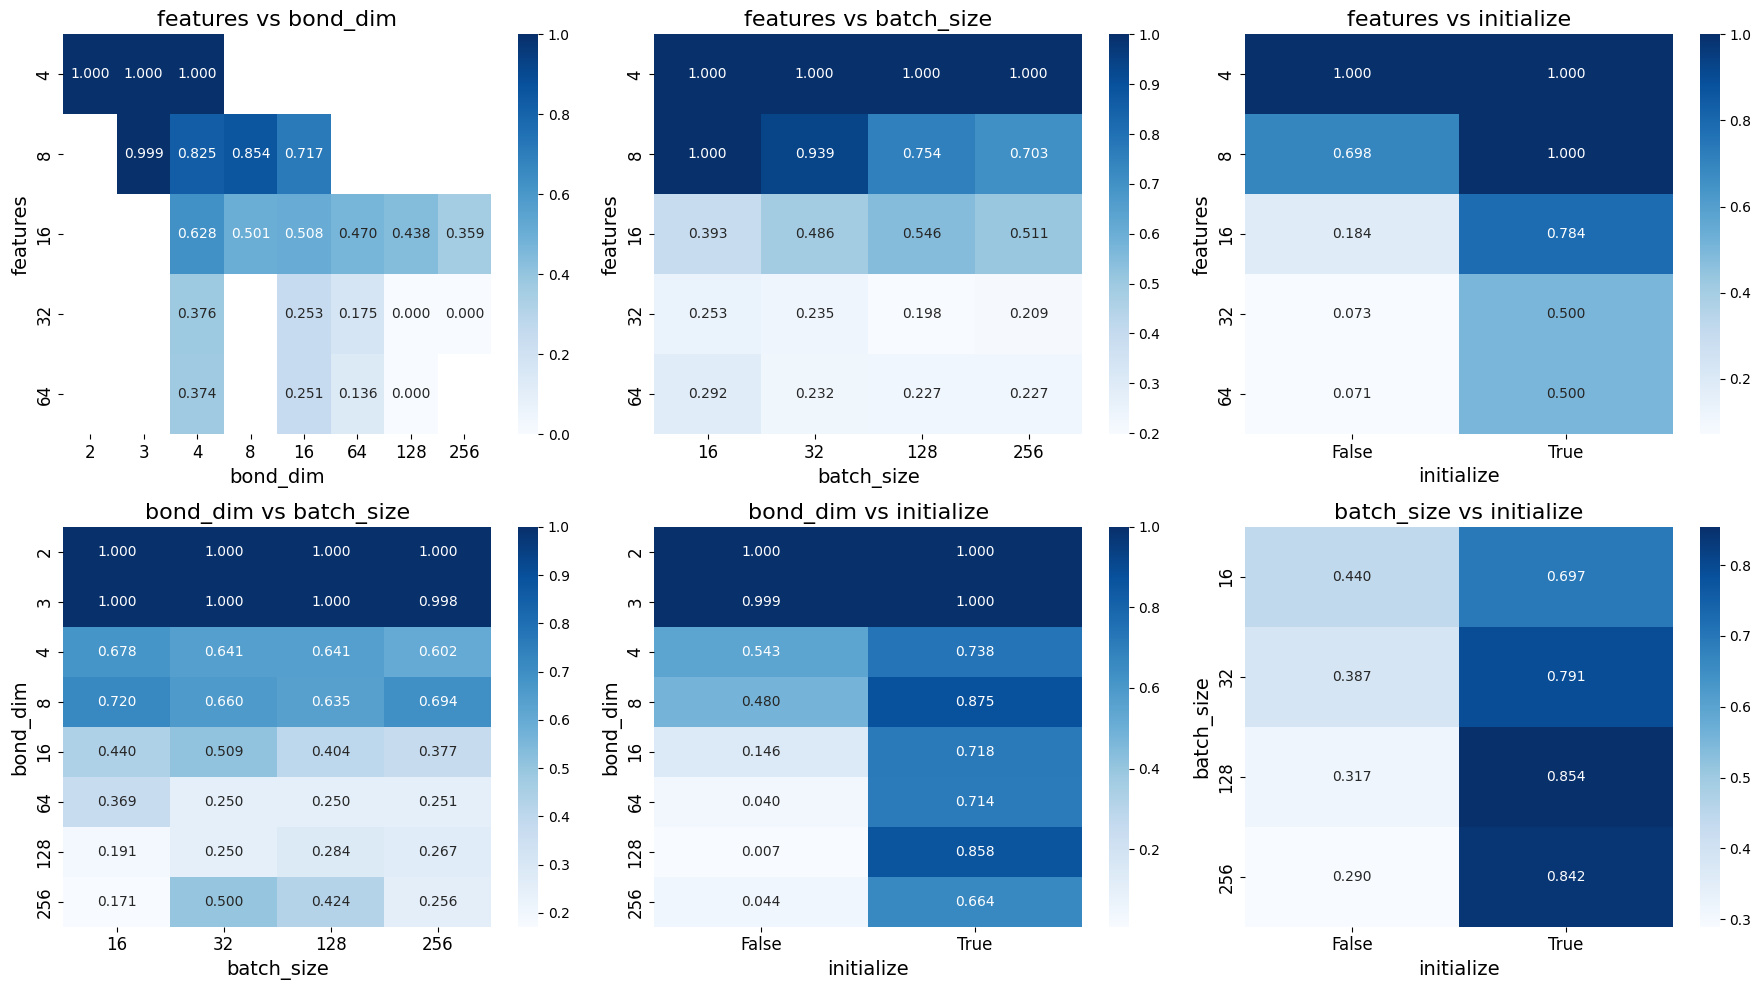

In [24]:
# plot heatmaps

fig, ax = heat_pairplot(data_df, data_df.columns[:4], 'test_acc')
for a in ax:
    a.tick_params(labelsize=FONTSIZE-2)
    a.set_title(a.get_title(), fontsize=FONTSIZE+2)
    a.set_xlabel(a.get_xlabel(), fontsize=FONTSIZE)
    a.set_ylabel(a.get_ylabel(), fontsize=FONTSIZE)

fig.tight_layout()

fig.savefig('data/grid_search/heatmaps.png', dpi=600)

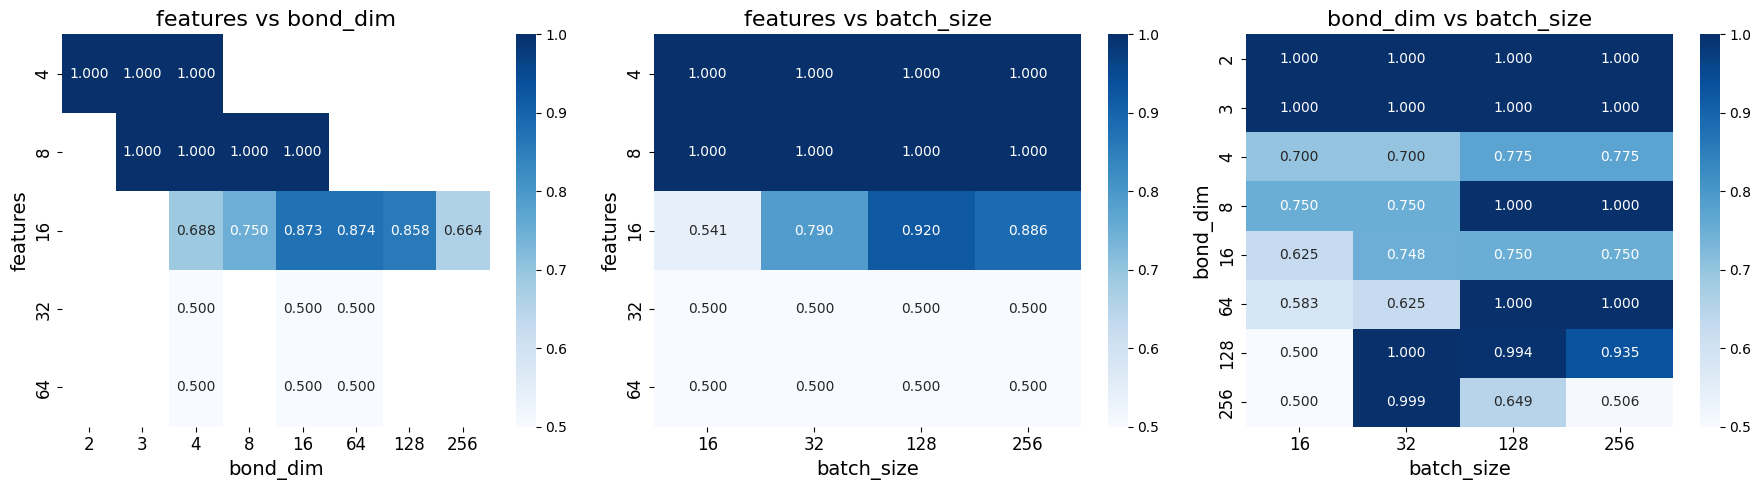

In [25]:

fig, ax = heat_pairplot(df_initTrue, df_initTrue.columns[:3], 'test_acc')
for a in ax:
    a.tick_params(labelsize=FONTSIZE-2)
    a.set_title(a.get_title(), fontsize=FONTSIZE+2)
    a.set_xlabel(a.get_xlabel(), fontsize=FONTSIZE)
    a.set_ylabel(a.get_ylabel(), fontsize=FONTSIZE)

fig.tight_layout()

fig.savefig('data/grid_search/heatmaps_initTrue.png', dpi=600)

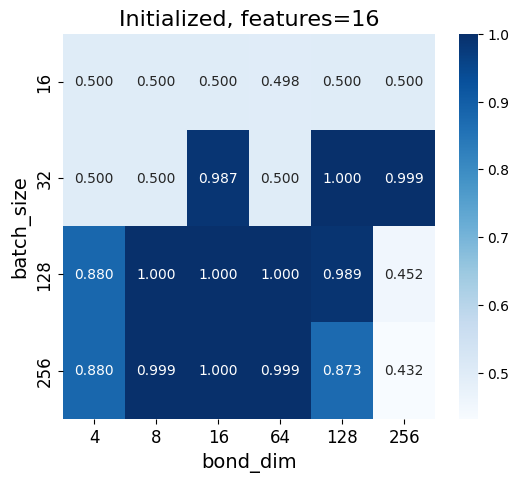

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

sns.heatmap(df_initTrue[(df_initTrue['features']==16) & (df_initTrue['dtype']=='torch.complex128')].pivot_table(index='batch_size', columns='bond_dim', values='test_acc', aggfunc='mean'), annot=True, fmt='.3f', cmap='Blues', ax=ax)
ax.set_title('Initialized, features=16', fontsize=FONTSIZE+2)
ax.set_xlabel('bond_dim', fontsize=FONTSIZE)
ax.set_ylabel('batch_size', fontsize=FONTSIZE)
ax.tick_params(labelsize=FONTSIZE-2)

fig.savefig('data/grid_search/heatmap_initTrue_features16.png', dpi=600)

<Axes: xlabel='test_acc0', ylabel='Count'>

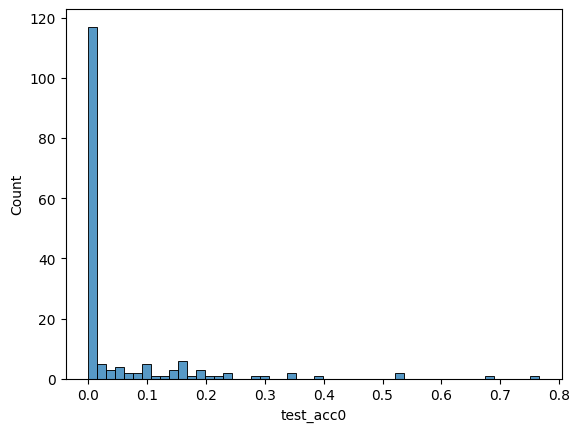

In [30]:
sns.histplot(df_initFalse['test_acc0'], bins=50)